In [20]:
#simple pendulum

# Python modules



def simplePendulum(n):
    '''Simple pendulum integration and animation'''
    print('\nYou chose the Simple Pendulum\n')

    # Let the user decide whether to use deafult parameters or to insert custom parameters
    print('Insert "d" to choose default parameters\n')
    print('Insert "s" to input your parameters\n')
    choice = str(input(''))

    # If the user chose to use default parameters
    # Set the default parameters
    if choice == 'd':

        # Set the point mass to 1kg
        m1 = 1
        # Set the rope length to 1m
        l1 = 1
        # Set the initial angle to 135deg and initial angular velocity to 0deg/s
        q0 = np.array([np.radians(135), np.radians(0)])
        # Set the starting time to 0s
        t0 = 0
        # Set the ending time to 10s
        tf = 10
        # Set the number of iterations to 1000
        nstep = 1000

        # Create the parameter list
        par = [m1, l1, q0, t0, tf, nstep]
        
    # If the user chose to insert custom parameters 
    # Call the inputParameters() function in inputParameters.py module
    elif choice == 's':
        par = inputParameters(n)
        m1, l1, q0, t0, tf, nstep = par

    # Integrate the equation of motion using the RungeKutta4() function in rungeKutta4.py module
    # Arguments passed to the function are:
    # 1) the simple pendulum equation of motion from the equationsMotion.py module
    # 2) the parameters list
    q, t, h = RungeKutta4(simplePendulumEq, par)

    # Compute the kinetic, potential and total energy through the simplePendulumEnergy() function in computeEnergy.py module
    E, U, T = simplePendulumEnergy(q, par)

    # Compute the cartesian (x, y) coordinates from the generalized coordinates q (i.e. angular positions)
    # using the computeCoordinates() function in computeCoordinates.py module
    x, y = computeCoordinates(n, q, par)


    # Let the user decide whether to plot static figures or animated figures
    print('\nInsert 0 for static plots')
    print('Insert 1 to see animations\n')
    mode = int(input(''))
    
    # If the user chose to display static plots:
    if mode == 0:

        # Create the figure and the axes using the staticFigure() function in the figureSetup.py module
        fig, ax1, ax2, ax3 = staticFigure(n, q, par)

        # Plot the pendulum trajectory
        ax1.plot(x, y, '-', lw=2, color = '#047FFF', label = '1st mass trajectory') 

        # Plot the theta trend over time
        ax2.plot(t, q[:,0], '-', lw=2, color = '#047FFF', label = '1st mass \u03B8(t)')
        
        # Plot the omega trend over time
        ax3.plot(t, q[:,1], '-', lw=2, color = '#047FFF', label = '1st mass \u03C9(t)')

        # Add a legend to the figures using the addLegend() function in the figureSetup.py module
        addLegend(n, ax1, ax2, ax3)

        # Save figure
        print('\nDo you want to save the figure?\n')
        save = str(input('[y/n]\n'))

        if save == 'y':
            saveStaticFig(n, fig)


    # If the user chose to display animated plots:
    elif mode == 1:

        # Create the figure and the axes using the animatedFigure() function in the figureSetup.py module
        fig, ax1, ax2, ax3, ax4, ax5 = animatedFigure(n, q, par)

        # Create the fixed point and the pendulum mass point as empty plots (they will be animated!)
        pendulumMass0, = ax1.plot([], [], 'o', color = '#000000', markersize = 5)
        pendulumMass1, = ax1.plot([], [], 'o', color = '#000000', markersize = 5+m1)
        masses = [pendulumMass0, pendulumMass1]

        # Create the pendulum rope as an empy plot (it will be animated!)
        pendulumSegment, = ax1.plot([], [], '-', lw=2, color = '#000000')

        # Create the pendulum trace of the trajectory as an empty plot (it will be animated!)
        pendulumTrace, = ax1.plot([], [], '-', lw=2, color = '#047FFF', label = '1st mass trajectory')

        # Create the theta trend over time trace as an empy plot (it will be animated!)
        thetaTrace, = ax2.plot([], [], '-', lw=2, color = '#047FFF', label = '1st mass \u03B8(t)')

        # Create the omega trend over time trace as an empy plot (it will be animated!)
        omegaTrace, = ax3.plot([], [], '-', lw=2, color = '#047FFF', label = '1st mass \u03C9(t)')

        # Add a legend to the figures using the addLegend() function in the figureSetup.py module
        addLegend(n, ax1, ax2, ax3)

        # Create the template and the text in which time will be displayed and updated each iteration
        time_template = 'time = %.1f s'
        time_text = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, weight = 'bold')

        # Create the template and the text in which the total energy of the system will be displayed and updated each iteration
        totalEnergy_template = 'total energy = %.2f J'
        totalEnergy_text = ax1.text(0.05, 0.87, '', transform=ax1.transAxes)

        texts = [time_template, time_text, totalEnergy_template, totalEnergy_text]

        # Create the kinetic energy bar
        rect1 = plt.Rectangle((0, -1), 1, 1, fill=True, color='white', ec='black')
        ax4.add_patch(rect1)

        # Create the potential energy bar
        rect2 = plt.Rectangle((0, -1), 1, 1, fill=True, color='white', ec='black')
        ax5.add_patch(rect2)

        # Animate the plots using functions in the animationModule.py module
        anim1 = animation.FuncAnimation(fig, simplePendulumAnimation, frames=len(t), fargs=[x, y, pendulumTrace, masses, pendulumSegment, texts, T, h], interval=h, blit=True)
        anim2 = animation.FuncAnimation(fig, kineticEnergyAnimation, frames=len(t), fargs=[ax4, E, U], interval=h, blit=True)
        anim3 = animation.FuncAnimation(fig, potentialEnergyAnimation, frames=len(t), fargs=[ax5, E, U], interval=h, blit=True)
        anim4 = animation.FuncAnimation(fig, simplePendulumTrend, frames=len(t), fargs=['theta', t, q, thetaTrace], interval=h, blit=True)
        anim5 = animation.FuncAnimation(fig, simplePendulumTrend, frames=len(t), fargs=['omega', t, q, omegaTrace], interval=h, blit=True)
        anim1.save('animacao_pendulosimples.gif', writer='pillow', fps=30)




    plt.show()

In [26]:
#double pendulum


# Python modules


def doublePendulum(n):
    '''Double pendulum integration and animation'''
    print('\nYou chose the Double Pendulum\n')

    # Let the user decide whether to use deafult parameters or to insert custom parameters
    print('Insert "d" to choose default parameters\n')
    print('Insert "s" to input your parameters\n')
    choice = str(input(''))

    # If the user chose to use default parameters
    # Set the default parameters
    if choice == 'd':

        # Set the points mass to 1kg
        m1 = 1
        m2 = 1
        # Set the ropes length to 1m
        l1 = 1
        l2 = 1
        # Set the initial angles to 135deg and initial angular velocities to 0deg/s
        q0 = np.array([
                        np.radians(135), np.radians(0), 
                        np.radians(135), np.radians(0)
                        ])
        # Set the starting time to 0s
        t0 = 0
        # Set the ending time to 10s
        tf = 10
        # Set the number of iterations to 1000
        nstep = 1000

        # Create the parameter list
        par = [m1, m2, l1, l2, q0, t0, tf, nstep]
    
    # If the user chose to insert custom parameters 
    # Call the inputParameters() function in inputParameters.py module
    elif choice == 's':
        par = inputParameters(n)
        m1, m2, l1, l2, q0, t0, tf, nstep = par

    # Integrate the equation of motion using the RungeKutta4() function in rungeKutta4.py module
    # Arguments passed to the function are:
    # 1) the double pendulum equation of motion from the equationsMotion.py module
    # 2) the parameters list
    q, t, h = RungeKutta4(doublePendulumEq, par)

    # Compute the kinetic, potential and total energy through the doublePendulumEnergy() function in computeEnergy.py module
    E, U, T = doublePendulumEnergy(q, par)

    # Compute the cartesian (x, y) coordinates from the generalized coordinates q (i.e. angular positions)
    # using the computeCoordinates() function in computeCoordinates.py module
    x, y = computeCoordinates(n, q, par)


    # Let the user decide whether to plot static figures or animated figures
    print('\nInsert 0 for static plots')
    print('Insert 1 to see animations\n')
    mode = int(input(''))
    
    # If the user chose to display static plots:
    if mode == 0:

        # Create the figure and the axes using the staticFigure() function in the figureSetup.py module
        fig, ax1, ax2, ax3 = staticFigure(n, q, par)

        # Plot the pendulum trajectory
        ax1.plot(x[:,0], y[:,0], '-', lw=2, color = '#047FFF', label = '1st mass trajectory') 
        ax1.plot(x[:,1], y[:,1], '-', lw=2, color = '#FF4B00', label = '2nd mass trajectory') 

        # Plot the theta trend over time
        ax2.plot(t, q[:,0], '-', lw=2, color = '#047FFF', label = '1st mass \u03B8(t)')
        ax2.plot(t, q[:,2], '-', lw=2, color = '#FF4B00', label = '2nd mass \u03B8(t)')
        
        # Plot the omega trend over time
        ax3.plot(t, q[:,1], '-', lw=2, color = '#047FFF', label = '1st mass \u03C9(t)') 
        ax3.plot(t, q[:,3], '-', lw=2, color = '#FF4B00', label = '2nd mass \u03C9(t)')

        # Add a legend to the figures using the addLegend() function in the figureSetup.py module
        addLegend(n, ax1, ax2, ax3)

        # Save figure
        print('\nDo you want to save the figure?\n')
        save = str(input('[y/n]\n'))

        if save == 'y':
            saveStaticFig(n, fig)

    # If the user chose to display animated plots:
    elif mode == 1:
        
        # Create the figure and the axes using the animatedFigure() function in the figureSetup.py module
        fig, ax1, ax2, ax3, ax4, ax5 = animatedFigure(n, q, par)

        # Create the fixed point and the pendulum mass points as empty plots (they will be animated!)
        pendulumMass0, = ax1.plot([], [], 'o', color = '#000000', markersize = 5)
        pendulumMass1, = ax1.plot([], [], 'o', color = '#000000', markersize = 5+m1)
        pendulumMass2, = ax1.plot([], [], 'o', color = '#000000', markersize = 5+m2)
        masses = [pendulumMass0, pendulumMass1, pendulumMass2]

        # Create the pendulum ropes as an empy plot (they will be animated!)
        pendulumSegments, = ax1.plot([], [], '-', lw=2, color = '#000000')

        # Create the pendulum trace of the trajectory as an empty plot (it will be animated!)
        pendulumTrace1, = ax1.plot([], [], '-', lw=2, color = '#047FFF', label = '1st mass trajectory')
        pendulumTrace2, = ax1.plot([], [], '-', lw=2, color = '#FF4B00', label = '2nd mass trajectory')
        pendulumTraces = [pendulumTrace1, pendulumTrace2]

        # Create the theta trend over time trace as an empy plot (it will be animated!)
        thetaTrace1, = ax2.plot([], [], '-', lw=2, color = '#047FFF', label = '1st mass \u03B8(t)')
        thetaTrace2, = ax2.plot([], [], '-', lw=2, color = '#FF4B00', label = '2nd mass \u03B8(t)')
        thetaTraces = [thetaTrace1, thetaTrace2]

        # Create the omega trend over time trace as an empy plot (it will be animated!)
        omegaTrace1, = ax3.plot([], [], '-', lw=2, color = '#047FFF', label = '1st mass \u03C9(t)')
        omegaTrace2, = ax3.plot([], [], '-', lw=2, color = '#FF4B00', label = '2nd mass \u03C9(t)')
        omegaTraces = [omegaTrace1, omegaTrace2]

        # Add a legend to the figures using the addLegend() function in the figureSetup.py module
        addLegend(n, ax1, ax2, ax3)

        # Create the template and the text in which time will be displayed and updated each iteration
        time_template = 'time = %.1fs'
        time_text = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, weight = 'bold')

        # Create the template and the text in which the total energy of the system will be displayed and updated each iteration
        totalEnergy_template = 'total energy = %.2f J'
        totalEnergy_text = ax1.text(0.05, 0.87, '', transform=ax1.transAxes)

        texts = [time_template, time_text, totalEnergy_template, totalEnergy_text]

        # Create the kinetic energy bar
        rect1 = plt.Rectangle((0, -1), 1, 1, fill=True, color='white', ec='black')
        ax4.add_patch(rect1)

        # Create the potential energy bar
        rect2 = plt.Rectangle((0, -1), 1, 1, fill=True, color='white', ec='black')
        ax5.add_patch(rect2)
        
        # Animate the plots using functions in the animationModule.py module
        anim1 = animation.FuncAnimation(fig, doublePendulumAnimation, frames=len(t), fargs=[x, y, pendulumTraces, masses, pendulumSegments, texts, T, h], interval=h, blit=True)
        anim2 = animation.FuncAnimation(fig, kineticEnergyAnimation, frames=len(t), fargs=[ax4, E, U], interval=h, blit=True)
        anim3 = animation.FuncAnimation(fig, potentialEnergyAnimation, frames=len(t), fargs=[ax5, E, U], interval=h, blit=True)
        anim4 = animation.FuncAnimation(fig, doublePendulumTrend, frames=len(t), fargs=['theta', t, q, thetaTraces], interval=h, blit=True)
        anim5 = animation.FuncAnimation(fig, doublePendulumTrend, frames=len(t), fargs=['omega', t, q, omegaTraces], interval=h, blit=True)
        # Para salvar a primeira animação como um arquivo GIF
        anim1.save('animacao_penduloduplo.gif', writer='pillow', fps=30)


In [30]:
#triple pendulum


def triplePendulum(n):
    '''Triple pendulum integration and animation'''
    print('\nYou chose the Triple Pendulum\n')

     # Let the user decide whether to use deafult parameters or to insert custom parameters
    print('Insert "d" to choose default parameters\n')
    print('Insert "s" to input your parameters\n')
    choice = str(input(''))

    # If the user chose to use default parameters
    # Set the default parameters
    if choice == 'd':

        # Set the points mass to 1kg
        m1 = 1
        m2 = 1
        m3 = 1
        # Set the ropes length to 1m
        l1 = 1
        l2 = 1
        l3 = 1
        # Set the initial angles to 135deg and initial angular velocities to 0deg/s
        q0 = np.array([
                        np.radians(135), np.radians(0), 
                        np.radians(135), np.radians(0), 
                        np.radians(135), np.radians(0)
                        ])
        # Set the starting time to 0s
        t0 = 0
        # Set the ending time to 10s
        tf = 10
        # Set the number of iterations to 1000
        nstep = 1000

        # Create the parameter list
        par = [m1, m2, m3, l1, l2, l3, q0, t0, tf, nstep]
    
    # If the user chose to insert custom parameters 
    # Call the inputParameters() function in inputParameters.py module
    elif choice == 's':
        par = inputParameters(n)
        m1, m2, m3, l1, l2, l3, q0, t0, tf, nstep = par

    # Integrate the equation of motion using the RungeKutta4() function in rungeKutta4.py module
    # Arguments passed to the function are:
    # 1) the triple pendulum equation of motion from the equationsMotion.py module
    # 2) the parameters list
    q, t, h = RungeKutta4(triplePendulumEq, par)

    # Compute the kinetic, potential and total energy through the triplePendulumEnergy() function in computeEnergy.py module
    E, U, T = triplePendulumEnergy(q, par)

    # Compute the cartesian (x, y) coordinates from the generalized coordinates q (i.e. angular positions)
    # using the computeCoordinates() function in computeCoordinates.py module
    x, y = computeCoordinates(n, q, par)


    # Let the user decide whether to plot static figures or animated figures
    print('\nInsert 0 for static plots')
    print('Insert 1 to see animations\n')
    mode = int(input(''))

    # If the user chose to display static plots:
    if mode == 0:

         # Create the figure and the axes using the staticFigure() function in the figureSetup.py module
        fig, ax1, ax2, ax3 = staticFigure(n, q, par)

        # Plot the pendulum trajectory
        ax1.plot(x[:,0], y[:,0], '-', lw=2, color = '#047FFF', label = '1st mass trajectory') 
        ax1.plot(x[:,1], y[:,1], '-', lw=2, color = '#FF4B00', label = '2nd mass trajectory')
        ax1.plot(x[:,2], y[:,2], '-', lw=2, color = '#00C415', label = '3rd mass trajectory') 

        # Plot the theta trend over time
        ax2.plot(t, q[:,0], '-', lw=2, color = '#047FFF', label = '1st mass \u03B8(t)')
        ax2.plot(t, q[:,2], '-', lw=2, color = '#FF4B00', label = '2nd mass \u03B8(t)')
        ax2.plot(t, q[:,3], '-', lw=2, color = '#00C415', label = '3rd mass \u03B8(t)')

        # Plot the omega trend over time
        ax3.plot(t, q[:,1], '-', lw=2, color = '#047FFF', label = '1st mass \u03C9(t)') 
        ax3.plot(t, q[:,3], '-', lw=2, color = '#FF4B00', label = '2nd mass \u03C9(t)')
        ax3.plot(t, q[:,5], '-', lw=2, color = '#00C415', label = '3rd mass \u03C9(t)')

        # Add a legend to the figures using the addLegend() function in the figureSetup.py module
        addLegend(n, ax1, ax2, ax3)

        # Save figure
        print('\nDo you want to save the figure?\n')
        save = str(input('[y/n]\n'))

        if save == 'y':
            saveStaticFig(n, fig)


    # If the user chose to display animated plots:
    elif mode == 1:
        
        # Create the figure and the axes using the animatedFigure() function in the figureSetup.py module
        fig, ax1, ax2, ax3, ax4, ax5 = animatedFigure(n, q, par)

        # Create the fixed point and the pendulum mass points as empty plots (they will be animated!)
        pendulumMass0, = ax1.plot([], [], 'o', color = '#000000', markersize = 5)
        pendulumMass1, = ax1.plot([], [], 'o', color = '#000000', markersize = 5+m1)
        pendulumMass2, = ax1.plot([], [], 'o', color = '#000000', markersize = 5+m2)
        pendulumMass3, = ax1.plot([], [], 'o', color = '#000000', markersize = 5+m3)
        masses = [pendulumMass0, pendulumMass1, pendulumMass2, pendulumMass3]

        # Create the pendulum ropes as an empy plot (they will be animated!)
        pendulumSegments, = ax1.plot([], [], '-', lw=2, color = '#000000')

        # Create the pendulum trace of the trajectory as an empty plot (it will be animated!)
        pendulumTrace1, = ax1.plot([], [], '-', lw=2, color = '#047FFF', label = '1st mass trajectory')
        pendulumTrace2, = ax1.plot([], [], '-', lw=2, color = '#FF4B00', label = '2nd mass trajectory')
        pendulumTrace3, = ax1.plot([], [], '-', lw=2, color = '#00C415', label = '3rd mass trajectory')
        pendulumTraces = [pendulumTrace1, pendulumTrace2, pendulumTrace3]

        # Create the theta trend over time trace as an empy plot (it will be animated!)
        thetaTrace1, = ax2.plot([], [], '-', lw=2, color = '#047FFF', label = '1st mass \u03B8(t)')
        thetaTrace2, = ax2.plot([], [], '-', lw=2, color = '#FF4B00', label = '2nd mass \u03B8(t)')
        thetaTrace3, = ax2.plot([], [], '-', lw=2, color = '#00C415', label = '3rd mass \u03B8(t)')
        thetaTraces = [thetaTrace1, thetaTrace2, thetaTrace3]

        # Create the omega trend over time trace as an empy plot (it will be animated!)
        omegaTrace1, = ax3.plot([], [], '-', lw=2, color = '#047FFF', label = '1st mass \u03C9(t)')
        omegaTrace2, = ax3.plot([], [], '-', lw=2, color = '#FF4B00', label = '2nd mass \u03C9(t)')
        omegaTrace3, = ax3.plot([], [], '-', lw=2, color = '#00C415', label = '3rd mass \u03C9(t)')
        omegaTraces = [omegaTrace1, omegaTrace2, omegaTrace3]

        # Add a legend to the figures using the addLegend() function in the figureSetup.py module
        addLegend(n, ax1, ax2, ax3)

        # Create the template and the text in which time will be displayed and updated each iteration
        time_template = 'time = %.1fs'
        time_text = ax1.text(0.05, 0.95, '', transform=ax1.transAxes, weight = 'bold')

        # Create the template and the text in which the total energy of the system will be displayed and updated each iteration
        totalEnergy_template = 'total energy = %.2f J'
        totalEnergy_text = ax1.text(0.05, 0.87, '', transform=ax1.transAxes)

        texts = [time_template, time_text, totalEnergy_template, totalEnergy_text]

        # Create the kinetic energy bar
        rect1 = plt.Rectangle((0, -1), 1, 1, fill=True, color='white', ec='black')
        ax4.add_patch(rect1)

        # Create the potential energy bar
        rect2 = plt.Rectangle((0, -1), 1, 1, fill=True, color='white', ec='black')
        ax5.add_patch(rect2)
        
        # Animate the plots using functions in the animationModule.py module
        anim1 = animation.FuncAnimation(fig, triplePendulumAnimation, frames=len(t), fargs=[x, y, pendulumTraces, masses, pendulumSegments, texts, T, h], interval=h, blit=True)
        anim2 = animation.FuncAnimation(fig, kineticEnergyAnimation, frames=len(t), fargs=[ax4, E, U], interval=h, blit=True)
        anim3 = animation.FuncAnimation(fig, potentialEnergyAnimation, frames=len(t), fargs=[ax5, E, U], interval=h, blit=True)
        anim4 = animation.FuncAnimation(fig, triplePendulumTrend, frames=len(t), fargs=['theta', t, q, thetaTraces], interval=h, blit=True)
        anim5 = animation.FuncAnimation(fig, triplePendulumTrend, frames=len(t), fargs=['omega', t, q, omegaTraces], interval=h, blit=True)
        anim1.save('animacao_pendulotriplo.gif', writer='pillow', fps=30)



    plt.show()

In [5]:
#input parametros
# Fill the p array with masses

def inputParameters(n):
    '''Reads parameters from keyboard and returns the list of parameters'''

    # Initialize the array p to hold masses and lengths
    p = np.zeros(2*n)
    # Initialize the array q to hold initial conditions
    q0 = np.zeros(2*n)
    # Initialize the array simTime to hold information time
    simTime = np.zeros(3)


    # Fill the p array with masses
    for i in range(n):    
        p[i] = float(input('\nInsert mass for point %1.0f: ' % (i+1)))

    # Fill the p array with lengths
    for j in range(n):
        p[j+n] = float(input('\nInsert length for rope %1.0f: ' % (j+1)))
    
    # Fill the q0 array with initial angles
    for k in range(n):
        q0[2*k] = np.radians(float(input('\nInsert initial angle of point %1.0f (in deg): ' % (k+1))))

    # Fill the q0 array with initial velocities
    for l in range(n):
        q0[2*l + 1] = np.radians(float(input('\nInsert initial angular velocity of point %1.0f (in deg/s): ' % (l+1))))

    # Fill the simTime array with the starting time, ending time and the number of iterations to perform
    simTime[0] = int(input("\nInsert starting time: "))
    simTime[1] = int(input("\nInsert ending time: "))
    simTime[2] = int(input('\nInsert number of iterations: '))

    # Create the parameters list
    par = [*p, q0, *simTime]

    return par

In [6]:
#equations of motions
#simple pendulum
def simplePendulumEq(q, t, par):
    '''Simple Pendulum equation of motion'''

    # Define relevant parameters
    g = 9.81
    m1 = par[0]
    l1 = par[1]

    # ThetaDot equation
    td = q[1]

    # OmegaDot equation
    od = -m1*(g/l1)*np.sin(q[0])

    return np.array([td, od])
def doublePendulumEq(q, t, par):
    '''Double Pendulum equation of motion'''

    # Define relevant parameters
    g = 9.81
    m1 = par[0]
    m2 = par[1]
    l1 = par[2]
    l2 = par[3]

    # ThetaDot equations
    td1 = q[1]
    td2 = q[3]

    # OmegaDot equations
    od1 = (-g * (2*m1 + m2) * np.sin(q[0]) -m2 * g * np.sin(q[0]-2*q[2]) -2 * np.sin(q[0]-q[2]) * m2 * (l2 * q[3]**2 + l1 * q[1]**2 * np.cos(q[0]-q[2]))) / (l1 * (2*m1 + m2 - m2*np.cos(2*q[0]-2*q[2])))
    od2 = (2 * np.sin(q[0]-q[2]) * ( l1 * q[1]**2 * (m1+m2) + g * (m1+m2) * np.cos(q[0]) + m2 * l2 * q[3]**2 * np.cos(q[0]-q[2]))) / (l2 * (2*m1 + m2 - m2*np.cos(2*q[0]-2*q[2])))

    return np.array([td1, od1, td2, od2])


#q[0] = theta0
#q[1] = omega0
#q[2] = theta1
#q[3] = omega1
#q[4] = theta2
#q[5] = omega2
def triplePendulumEq(q, t, par):
    '''Triple Pendulum equation of motion'''

    # Define relevant parameters
    g = 9.81
    m1 = par[0]
    m2 = par[1]
    m3 = par[2]
    l1 = par[3]
    l2 = par[4]
    l3 = par[5]

    # Define useful mass combinations
    m12 = m2 + m3
    m012 = m1 + m2 + m3
    mf = m012/4

    # Define useful sines 
    sin0 = np.sin(q[0])
    sin1 = np.sin(q[2])
    sin2 = np.sin(q[4])

    # Define useful sine and cosine of differences
    cos01 = np.cos(q[0]-q[2])
    cos02 = np.cos(q[0]-q[4])
    cos12 = np.cos(q[2]-q[4])
    sin01 = np.sin(q[0]-q[2])
    sin02 = np.sin(q[0]-q[4])
    sin12 = np.sin(q[2]-q[4])

    # Define useful recurrent patterns
    r1 = m12*cos01*cos02 - m012*cos12
    r2 = m012 - m12*(cos01)**2
    r3 = -m012 + m3*(cos02)**2

    # Define parts of the first equation
    od1_1 = 4*m3*m12
    od1_2 = r1*cos01 + r2*cos02
    od1_3 = -g*sin2 + l1*sin02*q[1]**2 + l2*sin12*q[3]**2
    od1_4 = -g*m2*sin1 - g*m3*sin1 + l1*m2*sin01*q[1]**2 + l1*m3*sin01*q[1]**2 - l3*m3*sin12*q[5]**2
    od1_5 = -m3*m12*( -cos02 + np.cos(q[0]-2*q[2]+q[4]) )**2 * m012
    od1_6 = g*m1*sin0 + g*m2*sin0 + g*m3*sin0 + l2*m2*sin01*q[3]**2 + l2*m3*sin01*q[3]**2 + l3*m3*sin02*q[5]**2
    od1_7 = m3*r1**2 + m12*r3*r2

    # Define parts of the second equation
    od2_1 = -g*sin2 + l1*sin02*q[1]**2 + l2*sin12*q[3]**2
    od2_2 = g*m1*sin0 + g*m2*sin0 + g*m3*sin0 + l2*m2*sin01*q[3]**2 + l2*m3*sin01*q[3]**2 + l3*m3*sin02*q[5]**2
    od2_3 = -g*m2*sin1 - g*m3*sin1 + l1*m2*sin01*q[1]**2 + l1*m3*sin01*q[1]**2 - l3*m3*sin12*q[5]**2

    # Define parts of the thirds equation
    od3_1 = g*m1*sin0 + g*m2*sin0 + g*m3*sin0 + l2*m2*sin01*q[3]**2 + l2*m3*sin01*q[3]**2 + l3*m3*sin02*q[5]**2
    od3_2 = -g*sin2 + l1*sin02*q[1]**2 + l2*sin12*q[3]**2
    od3_3 = g*m2*sin1 + g*m3*sin1 - l1*m2*sin01*q[1]**2 - l1*m3*sin01*q[1]**2 + l3*m3*sin12*q[5]**2

    # ThetaDot equations
    td1 = q[1]
    td2 = q[3]
    td3 = q[5]

    # OmegaDot equations
    od1 = mf * ( od1_1 * od1_2 * od1_3 * r2 - 4 * ( -m3 * od1_2 * r1 + ( m3 * r1**2 + m12 * r3 * r2 ) * cos01 ) * od1_4 - ( od1_5 + 4*m3*r1**2 + 4*m12*r3*r2 ) * od1_6 ) / ( l1 * od1_7 * m012 * r2)
    od2 = ( -m3 * r1 * m012 * od2_1 * r2 - ( m3 * ( r1*cos01 + r2*cos02 ) * r1 - ( m3*r1**2 + m12*r3*r2 ) * cos01 ) * od2_2 + m012*r3*r2*od2_3 ) / ( l2 * od1_7 * r2 )
    od3 = -( m12 * (od1_2) * (od3_1) + m12 * m012 * (od3_2) * r2 - r1*m012 * od3_3 ) / ( l3 * ( m3*r1**2 + m12*r3*r2 ) )

    return np.array([td1, od1, td2, od2, td3, od3])

In [7]:
#runge kutta4
def RungeKutta4(f, par):
    ''' 
        Runge-Kutta 4: the algorithm asks for the function f, 
        which is the callable equation of motion function, 
        and the list of parameters of the system
    '''

    # Unpack initial conditions
    q0 = par[-4]

    # Unpack time conditions and number of iterations
    t0 = par[-3]
    tf = par[-2]
    n  = par[-1]

    # Make the time grid
    t = np.linspace(int(t0), int(tf), int(n)+1)
    h = t[1]-t[0]

    # Initialize the solution array
    q = np.array((int(n)+1)*[q0])
    
    # Fill the solution array using the RungeKutta 4 iterative method
    for i in range(int(n)):
        k1 = h * f(q[i], t[i], par)
        k2 = h * f(q[i] + 0.5 * k1, t[i] + 0.5*h, par)
        k3 = h * f(q[i] + 0.5 * k2, t[i] + 0.5*h, par)
        k4 = h * f(q[i] + k3, t[i] + h, par)
        q[i+1] = q[i] + (k1 + 2*(k2 + k3) + k4) / 6

    return q, t, h

In [8]:
#compute coordinates
def computeCoordinates(n, q, par):
    '''Computes cartesian coordinates from generalized coordinates'''

    # Initialize (x, y) arrays to be multi dimensional arrays depending on the type of pendulum
    x = np.zeros((n, len(q[:,0])))
    y = np.zeros((n, len(q[:,0])))

    # If the system is the simple pendulum
    if n == 1:

        x[0] = +par[n] * np.sin(q[:,0])
        y[0] = -par[n] * np.cos(q[:,0])

    # If the system is the double pendulum
    elif n == 2:
        x[0] = +par[n] * np.sin(q[:,0])
        y[0] = -par[n] * np.cos(q[:,0])
        x[1] = +par[n+1] * np.sin(q[:,2]) + x[0]
        y[1] = -par[n+1] * np.cos(q[:,2]) + y[0]
    
    # If the system is the triple pendulum
    elif n == 3:
        x[0] = +par[n] * np.sin(q[:,0])
        y[0] = -par[n] * np.cos(q[:,0])
        x[1] = +par[n+1] * np.sin(q[:,2]) + x[0]
        y[1] = -par[n+1] * np.cos(q[:,2]) + y[0]
        x[2] = +par[n+2] * np.sin(q[:,4]) + x[1]
        y[2] = -par[n+2] * np.cos(q[:,4]) + y[1]

    return x.T, y.T

In [9]:
#compute energy

# Python module

def simplePendulumEnergy(q, par):
    '''Computes and returns total energy of the simple pendulum system'''

    # Unpack the relevant parameters
    m1 = par[0]
    l1 = par[1]

    # Unpack theta and omega from the generalized coordinates array q
    t1, o1 = q.T

    # Initialize arrays for the three energies
    E = np.zeros(len(t1))
    U = np.zeros(len(t1))
    T = np.zeros(len(t1))

    # Fill the energy arrays 
    for i in range(len(t1)):
        E[i] = 0.5 * m1 * l1**2 * o1[i]**2
        U[i] = - m1 * 9.81 * l1*np.cos(t1[i])
        T[i] = E[i] + U[i]

    return E, U, T


def doublePendulumEnergy(q, par):
    '''Computes and returns total energy of the double pendulum system'''

    # Unpack the relevant parameters
    m1 = par[0]
    m2 = par[1]
    l1 = par[2]
    l2 = par[3]

    # Unpack theta and omega from the generalized coordinates array q
    t1, o1, t2, o2 = q.T

    # Initialize arrays for the three energies
    E = np.zeros(len(t1))
    U = np.zeros(len(t1))
    T = np.zeros(len(t1))

    # Fill the energy arrays
    for i in range(len(t1)):
        E[i] = 0.5 * (m1+m2) * l1**2 * o1[i]**2 + 0.5 * m2 * l2**2 * o2[i]**2 + m2 * l1 * l2 * o1[i]*o2[i]*np.cos(t1[i]-t2[i])
        U[i] = - m1 * 9.81 * l1*np.cos(t1[i]) - m2 * 9.81 * (l1*np.cos(t1[i]) + l2*np.cos(t2[i]))
        T[i] = E[i] + U[i]

    return E, U, T


def triplePendulumEnergy(q, par):
    '''Computes and returns total energy of the triple pendulum system'''

    # Unpack the relevant parameters
    m1 = par[0]
    m2 = par[1]
    m3 = par[2]
    l1 = par[3]
    l2 = par[4]
    l3 = par[5]

    # Unpack theta and omega from the generalized coordinates array q
    t1, o1, t2, o2, t3, o3 = q.T

    # Initialize arrays for the three energies
    E = np.zeros(len(t1))
    U = np.zeros(len(t1))
    T  = np.zeros(len(t1))

    # Fill the energy arrays
    for i in range(len(t1)):
        E[i] = 0.5 * (m1+m2+m3) * l1**2 * o1[i]**2 + 0.5 * (m2+m3) * l2**2 * o2[i]**2 + 0.5 * m3 * l3**2 * o3[i]**2 + (m2+m3)*l1*l2*o1[i]*o2[i]*np.cos(t1[i]-t2[i]) +  m3*l1*l3*o1[i]*o3[i]*np.cos(t1[i]-t3[i]) + m3*l2*l3*o2[i]*o3[i]*np.cos(t2[i]-t3[i])
        U[i] = - 9.81 * ( l1*(m1+m2+m3)*np.cos(t1[i]) + l2*(m2+m3)*np.cos(t2[i]) +  l3*m3*np.cos(t3[i]) )
        T[i] = E[i] + U[i]

    return E, U, T

In [10]:
#figureSetup

def staticFigure(n, q, par):
    '''Static plot figure configuration'''

    # Create the figure
    fig = plt.figure(figsize=(14, 6))
    # Set the figure axes grid
    gs = fig.add_gridspec(9, 33)
    
    # Create the axes:
    # ax1 holds the pendulum trajectory
    # ax2 holds the theta trend
    # ax3 holds the omega trend
    ax1 = fig.add_subplot(gs[:, 20:])
    ax2 = fig.add_subplot(gs[0:4, 0:17])
    ax3 = fig.add_subplot(gs[5:9, 0:17])

    # ax1 title and labels
    ax1.set_title('Pendulum Trajectory')
    ax1.set_xlabel('x coordinate (m)')
    ax1.set_ylabel('y coordinate (m)')

    # ax2 title and labels
    ax2.set_title('\u03B8 trend over time')
    ax2.set_xlabel('time (s)', loc = 'right')
    ax2.set_ylabel('\u03B8 (rad)', loc = 'top')

    # ax3 title and labels
    ax3.set_title('\u03C9 trend over time')
    ax3.set_xlabel('time (s)', loc = 'right')
    ax3.set_ylabel('\u03C9 (rad/s)', loc = 'top')

    # Unpack time parameters
    t0 = par[-3]
    tf = par[-2]


    # If the system is the simple pendulum
    if n == 1:

        # Unpack the length of the rope
        l1 = par[n]

        # Compute the total length
        l = l1

        # Compute the maximum and minimum of the theta trend
        tMin = np.amin(q[:,0])
        tMax = np.amax(q[:,0])

        # Compute the maximum and minimum of the omega trend
        oMin = np.amin(q[:,1])
        oMax = np.amax(q[:,1])


    # If the system is the double pendulum
    elif n == 2: 

        # Unpack the length of the ropes
        l1 = par[n]
        l2 = par[n+1]

        # Compute the total length
        l = l1 + l2

        # Compute the maximum and minimum of the theta trend
        t1Min = np.amin(q[:,0])
        t2Min = np.amin(q[:,2])
        tMin = np.minimum(t1Min, t2Min)

        t1Max = np.amax(q[:,0])
        t2Max = np.amax(q[:,2])
        tMax = np.maximum(t1Max, t2Max)

        # Compute the maximum and minimum of the omega trend
        o1Min = np.amin(q[:,1])
        o2Min = np.amin(q[:,3])
        oMin = np.minimum(o1Min, o2Min)

        o1Max = np.amax(q[:,1])
        o2Max = np.amax(q[:,3])
        oMax = np.maximum(o1Max, o2Max)


    # If the system is the triple pendulum
    elif n == 3: 
        
        # Unpack the length of the ropes
        l1 = par[n]
        l2 = par[n+1]
        l3 = par[n+2]

        # Compute the total length
        l = l1 + l2 + l3

        # Compute the maximum and minimum of the theta trend
        t1Min = np.amin(q[:,0])
        t2Min = np.amin(q[:,2])
        t3Min = np.amin(q[:,4])
        tMin = np.amin([t1Min, t2Min, t3Min])
    
        t1Max = np.amax(q[:,0])
        t2Max = np.amax(q[:,2])
        t3Max = np.amax(q[:,4])
        tMax = np.amax([t1Max, t2Max, t3Max])

        # Compute the maximum and minimum of the omega trend
        o1Min = np.amin(q[:,1])
        o2Min = np.amin(q[:,3])
        o3Min = np.amin(q[:,4])
        oMin = np.amin([o1Min, o2Min, o3Min])
    
        o1Max = np.amax(q[:,1])
        o2Max = np.amax(q[:,3])
        o3Max = np.amax(q[:,4])
        oMax = np.amax([o1Max, o2Max, o3Max])


    # Compute the half span of theta and omega trends
    varT = (tMax - tMin) / 2
    varO = (oMax - oMin) / 2

    # Set ax1 plot range
    ax1.set_xlim(-(l + l/5), l + l/5)
    ax1.set_ylim(-(l + l/5), l + l/5)

    # Set ax2 plot range
    ax2.set_xlim(t0, tf)
    ax2.set_ylim(tMin - varT/2, tMax + varT)

    # Set ax3 plot range
    ax3.set_xlim(t0, tf)
    ax3.set_ylim(oMin - varO/2, oMax + varO)

    return fig, ax1, ax2, ax3


def animatedFigure(n, q, par):
    '''Animated plot figure configuration'''

    # Create the figure
    fig = plt.figure(figsize=(16, 6))
    # Set the figure axes grid
    gs = fig.add_gridspec(9, 35)

    # Create the axes:
    # ax1 holds the pendulum trajectory
    # ax2 holds the theta trend
    # ax3 holds the omega trend
    # ax4 holds the kinetic energy bar
    # ax5 holds the potential energy bar
    ax1 = fig.add_subplot(gs[:, 20:-2])
    ax2 = fig.add_subplot(gs[0:4, 0:17])
    ax3 = fig.add_subplot(gs[5:9, 0:17])
    ax4 = fig.add_subplot(gs[:, -2:-1])
    ax5 = fig.add_subplot(gs[:, -1:])

    # ax1 title and labels
    ax1.set_title('Pendulum Trajectory')
    ax1.set_xlabel('x coordinate (m)')
    ax1.set_ylabel('y coordinate (m)')

    # ax2 title and labels
    ax2.set_title('\u03B8 trend over time')
    ax2.set_xlabel('time (s)', loc = 'right')
    ax2.set_ylabel('\u03B8 (rad)', loc = 'top')

    # ax3 title and labels
    ax3.set_title('\u03C9 trend over time')
    ax3.set_xlabel('time (s)', loc = 'right')
    ax3.set_ylabel('\u03C9 (rad/s)', loc = 'top')

    # ax4 title and labels
    ax4.set_title(r'E$_k$')
    ax4.axes.xaxis.set_ticks([])
    ax4.axes.yaxis.set_ticks([])
    ax4.yaxis.set_label_position("right")

    # ax5 title and labels
    ax5.set_title(r'E$_p$')
    ax5.axes.xaxis.set_ticks([])
    ax5.axes.yaxis.set_ticks([])
    ax5.yaxis.set_label_position("right")

    # Unpack time parameters
    t0 = par[-3]
    tf = par[-2]

    # If the system is the simple pendulum
    if n == 1:
        
        # Unpack the length of the rope
        l1 = par[n]

        # Compute the total length
        l = l1

        # Compute the maximum and minimum of the theta trend
        tMin = np.amin(q[:,0])
        tMax = np.amax(q[:,0])

        # Compute the maximum and minimum of the omega trend
        oMin = np.amin(q[:,1])
        oMax = np.amax(q[:,1])


    # If the system is the double pendulum
    elif n == 2: 
        
        # Unpack the length of the ropes
        l1 = par[n]
        l2 = par[n+1]

        # Compute the total length
        l = l1 + l2

        # Compute the maximum and minimum of the theta trend
        t1Min = np.amin(q[:,0])
        t2Min = np.amin(q[:,2])
        tMin = np.minimum(t1Min, t2Min)

        t1Max = np.amax(q[:,0])
        t2Max = np.amax(q[:,2])
        tMax = np.maximum(t1Max, t2Max)

        # Compute the maximum and minimum of the omega trend
        o1Min = np.amin(q[:,1])
        o2Min = np.amin(q[:,3])
        oMin = np.minimum(o1Min, o2Min)

        o1Max = np.amax(q[:,1])
        o2Max = np.amax(q[:,3])
        oMax = np.maximum(o1Max, o2Max)

    
    # If the system is the triple pendulum
    elif n == 3: 

        # Unpack the length of the ropes
        l1 = par[n]
        l2 = par[n+1]
        l3 = par[n+2]

        # Compute the total length
        l = l1 + l2 + l3

        # Compute the maximum and minimum of the theta trend
        t1Min = np.amin(q[:,0])
        t2Min = np.amin(q[:,2])
        t3Min = np.amin(q[:,4])
        tMin = np.amin([t1Min, t2Min, t3Min])
    
        t1Max = np.amax(q[:,0])
        t2Max = np.amax(q[:,2])
        t3Max = np.amax(q[:,4])
        tMax = np.amax([t1Max, t2Max, t3Max])

        # Compute the maximum and minimum of the omega trend
        o1Min = np.amin(q[:,1])
        o2Min = np.amin(q[:,3])
        o3Min = np.amin(q[:,4])
        oMin = np.amin([o1Min, o2Min, o3Min])
    
        o1Max = np.amax(q[:,1])
        o2Max = np.amax(q[:,3])
        o3Max = np.amax(q[:,4])
        oMax = np.amax([o1Max, o2Max, o3Max])


    # Compute the half span of theta and omega trends
    varT = (tMax - tMin) / 2
    varO = (oMax - oMin) / 2

    # Set ax1 plot range
    ax1.set_xlim(-(l + l/5), l + l/5)
    ax1.set_ylim(-(l + l/5), l + l/5)

    # Set ax2 plot range
    ax2.set_xlim(t0, tf)
    ax2.set_ylim(tMin - varT/2, tMax + varT)

    # Set ax3 plot range
    ax3.set_xlim(t0, tf)
    ax3.set_ylim(oMin - varO/2, oMax + varO)

    # Set ax4 plot range
    ax4.set_xlim(0, 1)
    ax4.set_ylim(-1, 1)

    # Set ax5 plot range
    ax5.set_xlim(0, 1)
    ax5.set_ylim(-1, 1)
    return fig, ax1, ax2, ax3, ax4, ax5


def addLegend(n, ax1, ax2, ax3):
    '''Adds the plot legend depending on the type of system'''

    ax1.legend(loc = 'upper right', ncol = 1)
    ax2.legend(loc = 'upper right', ncol = n)
    ax3.legend(loc = 'upper right', ncol = n)
    return

In [11]:
#animation


def simplePendulumTrend(i, s, t, q, lines):
    ''''Animate coordinate trends over time for a simple pendulum'''

    # Unpack the line to plot
    line1 = lines

    # If the line refers to the angle
    if s == 'theta':  
        # Set new data for each iteration
        line1.set_data(t[:i], q[:i, 0])
    
    # If the line refers to the velocity
    elif s == 'omega':
        # Set new data for each iteration
        line1.set_data(t[:i], q[:i, 1])

    return line1,

def doublePendulumTrend(i, s, t, q, lines):
    '''Animate coordinate trends over time for a double pendulum'''

    # Unpack the lines to plot
    line1, line2 = lines

    # If the line refers to the angle
    if s == 'theta':  
        # Set new data for each iteration
        line1.set_data(t[:i], q[:i, 0])
        line2.set_data(t[:i], q[:i, 2])
    
    # If the line refers to the velocity
    elif s == 'omega':
        # Set new data for each iteration
        line1.set_data(t[:i], q[:i, 1])
        line2.set_data(t[:i], q[:i, 3])

    return line1, line2,

def triplePendulumTrend(i, s, t, q, lines):
    '''Animate coordinate trends over time for a triple pendulum'''

    # Unpack the lines to plot
    line1, line2, line3 = lines

    # If the line refers to the angle
    if s == 'theta':  
        # Set new data for each iteration
        line1.set_data(t[:i], q[:i, 0])
        line2.set_data(t[:i], q[:i, 2])
        line3.set_data(t[:i], q[:i, 4])
    
    # If the line refers to the velocity
    elif s == 'omega':
        # Set new data for each iteration
        line1.set_data(t[:i], q[:i, 1])
        line2.set_data(t[:i], q[:i, 3])
        line3.set_data(t[:i], q[:i, 5])

    return line1, line2, line3,

def simplePendulumAnimation(i, x, y, traces, masses, segments, texts, T, h):
    '''Animate the simple pendulum'''

    # Set the points position over each iteration
    massX0 = [0]
    massY0 = [0]
    massX1 = [x[i, 0]]
    massY1 = [y[i, 0]]

    # Set the segment position over each iteration
    segmentX = [0, x[i, 0]]
    segmentY = [0, y[i, 0]]

    # Unpack the trajecotry trace
    trace1 = traces

    # Plot the trajectory trace data over each iteration
    trace1.set_data(x[i-25:i, 0], y[i-25:i, 0])

    # Unpack mass points
    mass0, mass1 = masses
    # Plot point positions
    mass0.set_data(massX0, massY0)
    mass1.set_data(massX1, massY1)

    # Plot segment position
    segments.set_data(segmentX, segmentY)

    # Unpack texts
    time_template, time_text, totalEnergy_template, totalEnergy_text = texts

    # Plot time text
    time_text.set_text(time_template % (i*h))
    # Plot total energy text
    totalEnergy_text.set_text(totalEnergy_template % (T[i]))

    return trace1, mass0, mass1, segments, time_text, totalEnergy_text,

def doublePendulumAnimation(i, x, y, traces, masses, segments, texts, T, h):
    '''Animate the double pendulum'''

    # Set the points position over each iteration
    massX0 = [0]
    massY0 = [0]
    massX1 = [x[i, 0]]
    massY1 = [y[i, 0]]
    massX2 = [x[i, 1]]
    massY2 = [y[i, 1]]

    # Set the segment position over each iteration
    segmentX = [0, x[i, 0], x[i, 1]]
    segmentY = [0, y[i, 0], y[i, 1]]

    # Unpack the trajecotry traces
    trace1, trace2 = traces

    # Plot the trajectory trace data over each iteration
    trace1.set_data(x[i-25:i, 0], y[i-25:i, 0])
    trace2.set_data(x[i-40:i, 1], y[i-40:i, 1])

    # Unpack mass points
    mass0, mass1, mass2 = masses
    # Plot point positions
    mass0.set_data(massX0, massY0)
    mass1.set_data(massX1, massY1)
    mass2.set_data(massX2, massY2)

    # Plot segments position
    segments.set_data(segmentX, segmentY)

    # Unpack texts
    time_template, time_text, totalEnergy_template, totalEnergy_text = texts

    # Plot time text
    time_text.set_text(time_template % (i*h))
    # Plot total energy text
    totalEnergy_text.set_text(totalEnergy_template % (T[i]))

    return trace1, trace2, mass0, mass1, mass2, segments, time_text, totalEnergy_text,

def triplePendulumAnimation(i, x, y, traces, masses, segments, texts, T, h):
    '''Animate the triple pendulum'''

    # Set the points position over each iteration
    massX0 = [0]
    massY0 = [0]
    massX1 = [x[i, 0]]
    massY1 = [y[i, 0]]
    massX2 = [x[i, 1]]
    massY2 = [y[i, 1]]
    massX3 = [x[i, 2]]
    massY3 = [y[i, 2]]

    # Set the segment position over each iteration
    segmentX = [0, x[i, 0], x[i, 1], x[i, 2]]
    segmentY = [0, y[i, 0], y[i, 1], y[i, 2]]

    # Unpack the trajecotry traces
    trace1, trace2, trace3 = traces

    # Plot the trajectory trace data over each iteration
    trace1.set_data(x[i-25:i, 0], y[i-25:i, 0])
    trace2.set_data(x[i-40:i, 1], y[i-40:i, 1])
    trace3.set_data(x[i-65:i, 2], y[i-65:i, 2])

    # Unpack mass points
    mass0, mass1, mass2, mass3 = masses
    # Plot point positions
    mass0.set_data(massX0, massY0)
    mass1.set_data(massX1, massY1)
    mass2.set_data(massX2, massY2)
    mass3.set_data(massX3, massY3)

    # Plot segments position
    segments.set_data(segmentX, segmentY)

    # Unpack texts
    time_template, time_text, totalEnergy_template, totalEnergy_text = texts

    # Plot time text
    time_text.set_text(time_template % (i*h))
    # Plot total energy text
    totalEnergy_text.set_text(totalEnergy_template % (T[i]))

    return trace1, trace2, trace3, mass0, mass1, mass2, mass3, segments, time_text, totalEnergy_text,


def kineticEnergyAnimation(i, ax, E, U):
    '''Animate the kinetic energy bar'''

    # Fill the bar with the kinetic energy
    rect1 = ax.fill_between(x = (0, 1), y1 = 0, y2 = E[i] / (np.abs(np.amax(E))+np.abs(np.amax(U))), color = 'red')

    return rect1,

def potentialEnergyAnimation(i, ax, E, U):
    '''Animate the potential energy bar'''

    # Fill the bar with the potential energy
    rect2 = ax.fill_between(x = (0, 1), y1 = 0, y2 = U[i] / (np.abs(np.amax(E))+np.abs(np.amax(U))), color = 'blue')

    return rect2,

In [12]:
#save figure
def saveStaticFig(n, fig):
    '''Save static figures'''

    # Set the path and file name to save the picture
    name = str(input('\nWrite the name of the file (without extention)\n'))
    png = '.png'
    path = './Pictures/'

    if n == 1:
        folder = 'simplePendulum/'
    elif n == 2:
        folder = 'doublePendulum/'
    elif n == 3:
        folder = 'triplePendulum/'

    fname = path + folder + name + png
    
    # Save the figure
    plt.savefig(fname, dpi=300, facecolor='w')

    return


You chose the Triple Pendulum

Insert "d" to choose default parameters

Insert "s" to input your parameters


Insert 0 for static plots
Insert 1 to see animations


Do you want to save the figure?



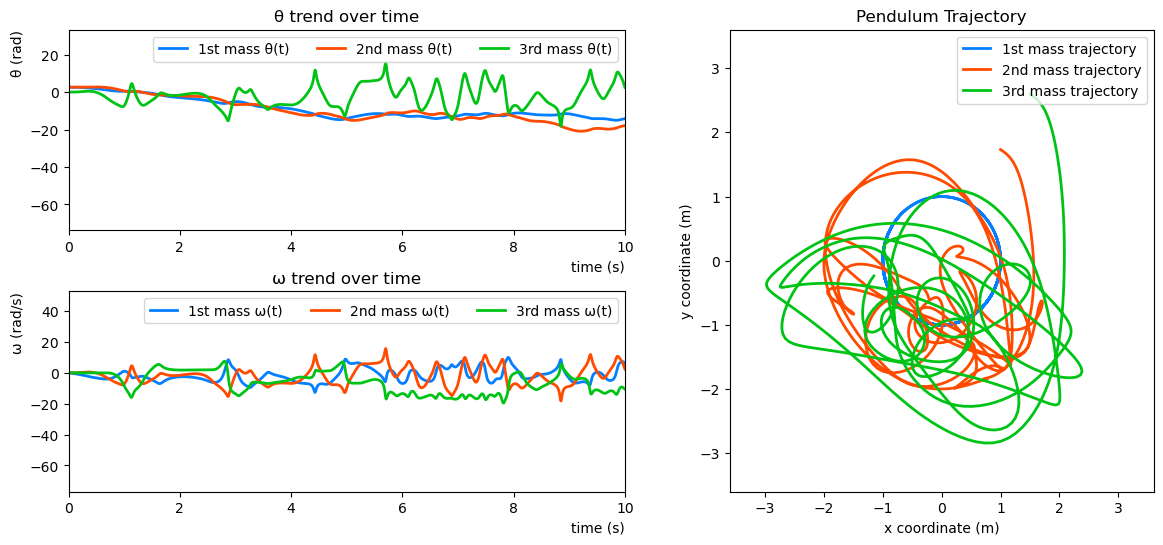

In [29]:
#código que tem os pêndulos simples, duplo e triplo
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import animation
#main

# Read input from keyboard
try:
    n=int(input('\n'))
except ValueError:
    print('\nMust be a number')
    
# Enter the appropriate function
if n == 1:
    simplePendulum(n)
    
elif n == 2:
    doublePendulum(n)

elif n == 3:
    triplePendulum(n)

else:
    print('Not supported')